자치구별 공원을 1인당 면적으로 비교해보자

In [2]:
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt
import koreanize_matplotlib

import mysql.connector

conn = mysql.connector.connect(
    host = "database-1.cbwuowec22t2.ap-northeast-2.rds.amazonaws.com",
    port = 3306,
    user = "team2",
    password = "1234",
    database = "eda_project"
)

query = """
    SELECT g.gu_name, p.park_type, p.park_size, p.park_for_one
    FROM gu g, park p
    WHERE g.gu_id = p.gu_id
"""


df = pd.read_sql(query, conn)

conn.close()

df

/tmp/ipykernel_30463/2824456597.py:23: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


,gu_name,park_type,park_size,park_for_one
0,강남구,공원,7794.55,14.16
1,강남구,도보생활권공원,3702.44,6.73
2,강동구,공원,3408.12,7.36
3,강동구,도보생활권공원,2127.21,4.59
4,강북구,공원,14570.45,49.73
5,강북구,도보생활권공원,2129.13,7.27
6,강서구,공원,4519.82,7.95
7,강서구,도보생활권공원,3532.42,6.21
8,관악구,공원,12484.82,25.08
9,관악구,도보생활권공원,1968.85,3.95


공원 면적을 자치구별로 비교해보자

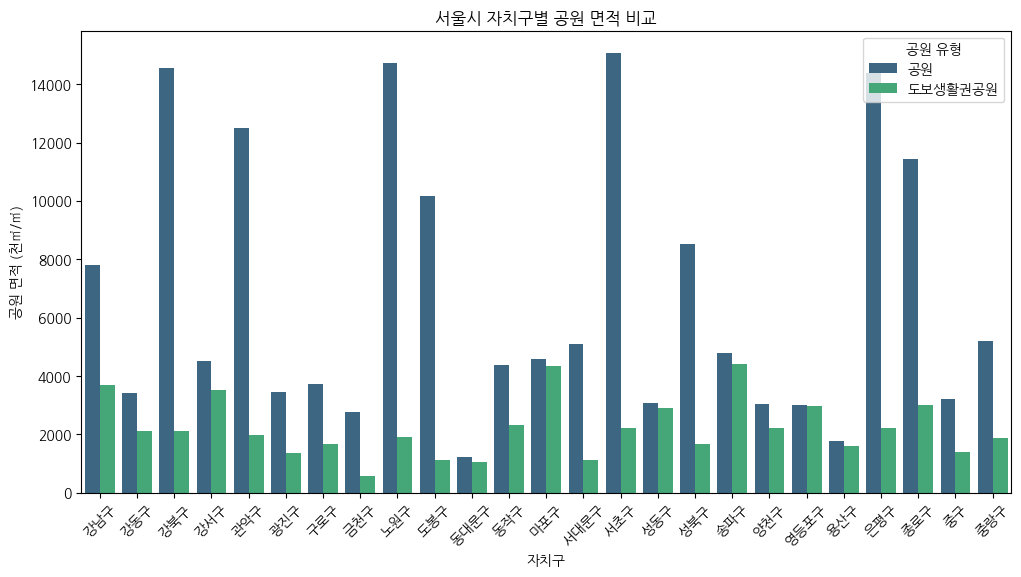

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.barplot(data=df, x="gu_name", y="park_size", hue="park_type", palette="viridis")

plt.xticks(rotation=45)
plt.xlabel("자치구")
plt.ylabel("공원 면적 (천㎡/㎡)")
plt.title("서울시 자치구별 공원 면적 비교")
plt.legend(title="공원 유형")
plt.show()

In [9]:
import folium
import geopandas as gpd
import json

geo_path = "../../data/02. skorea_municipalities_geo_simple.json"
geo_str = json.load(open(geo_path, encoding="utf-8"))

m = folium.Map(location=[37.5665, 126.9780], zoom_start=11, tiles="cartodb positron")

folium.Choropleth(
    geo_data=geo_str,
    data=df[df["park_type"] == "공원"],
    columns=["gu_name", "park_size"],
    key_on="feature.id",
    fill_color="YlGn",
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="공원 면적 (천㎡)"
).add_to(m)

m


In [10]:
import folium
import geopandas as gpd
import json

geo_path = "../../data/02. skorea_municipalities_geo_simple.json"
geo_str = json.load(open(geo_path, encoding="utf-8"))

m = folium.Map(location=[37.5665, 126.9780], zoom_start=11, tiles="cartodb positron")

folium.Choropleth(
    geo_data=geo_str,
    data=df[df["park_type"] == "도보생활권공원"],
    columns=["gu_name", "park_size"],
    key_on="feature.id",
    fill_color="YlGn",
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="공원 면적 (㎡)"
).add_to(m)

m

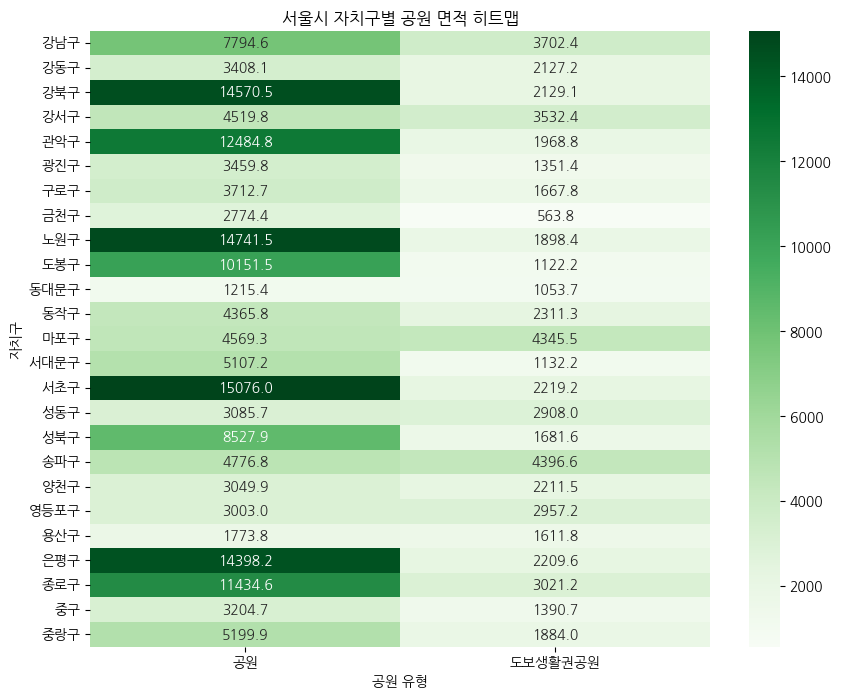

In [15]:
plt.figure(figsize=(10, 8))
df_pivot = df.pivot(index="gu_name", columns="park_type", values="park_size")

sns.heatmap(df_pivot, annot=True, cmap="Greens", fmt=".1f")

plt.xlabel("공원 유형")
plt.ylabel("자치구")
plt.title("서울시 자치구별 공원 면적 히트맵")
plt.show()


전체 면적 대비 1인당 면적 경향과 오차 그래프 만들기